## Подготовка данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import numpy as np
import warnings
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score

In [ ]:
# просмотр, где находится каталог с файлами на COLAB
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# получить доступ к каталогу и уточнить названия папок
import os
os.listdir('/content/drive/My Drive/Colab Notebooks/Яндекс/Проект 6 Отток клиентов')

['Churn.csv', 'ПРАВКА', 'Отток клиентов.ipynb', 'GitHub']

In [ ]:
# загружаем данные
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Яндекс/Проект 6 Отток клиентов/Churn.csv')

In [ ]:
# просмотр типов данных и кол-ва ненулевых значений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
# подсчет нулевых значений
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

909/10000*100=9% - пропусков, более 1%. Удалять не безопасно, заполним медианными значениями.

In [ ]:
# заполнение пропусков медианными значениями
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())

In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


## Вывод

**В результате подготовки данных, установлено:**

1. Пропусков в столбце "Tenure" порядка 9% (проведена замена на медианные значения).
2. Необходимо удалить столбцы 'CustomerId', 'RowNumber', 'Surname' из признаков (они не несут полезной информации для предсказания).

## Исследование задачи

In [ ]:
# удаление столбцов из признаков
# назначение целевого признака
features = data.drop(['Exited', 'CustomerId', 'RowNumber', 'Surname'], axis=1)
target = data['Exited']

In [ ]:
# прямое кодирование
features = pd.get_dummies(features, drop_first=True)

In [ ]:
# исследование баланса классов
features_zeros = features[target == 0] 
features_ones = features[target == 1] 

target_zeros  = target[target == 0] 
target_ones = target[target == 1] 

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(7963, 11)
(2037, 11)
(7963,)
(2037,)


Соотношение 8:2

In [ ]:
# масштабирование признаков
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance','EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features[numeric])
features[numeric] = scaler.transform(features[numeric])

In [ ]:
# результат масштабирования
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.086246,-1.225848,1,1,1,0.021886,0,0,0
1,-0.440036,0.198164,-1.448581,0.117350,1,0,1,0.216534,0,1,0
2,-1.536794,0.293517,1.087768,1.333053,3,1,0,0.240687,0,0,0
3,0.501521,0.007457,-1.448581,-1.225848,2,0,0,-0.108918,0,0,0
4,2.063884,0.388871,-1.086246,0.785728,1,1,1,-0.365276,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,0.000761,-1.225848,2,1,0,-0.066419,0,0,1
9996,-1.391939,-0.373958,1.812439,-0.306379,1,1,1,0.027988,0,0,1
9997,0.604988,-0.278604,0.725432,-1.225848,1,0,1,-1.008643,0,0,0
9998,1.256835,0.293517,-0.723910,-0.022608,2,1,0,-0.125231,1,0,1


In [ ]:
# деление на обучающую и валидационно-тестовую выборку (60:40)
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.4, random_state=12345)

In [ ]:
# деление валидационно-тестовой выборки (50:50)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size=0.5, random_state=12345)

### Решающее дерево - DecisionTreeClassifier

In [ ]:
# функция поиска лучшей модели DecisionTreeClassifier
def DecisionTreeClassifier_model(features_train, target_train):
  best_model_DecisionTreeClassifier = None
  best_result = 0
  for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid) 
    result = f1_score(target_valid, predictions_valid) 
    if result > best_result:
      best_model_DecisionTreeClassifier = model
      best_result = result
  
  print("F1 лучшей модели (DecisionTreeClassifier):", round(best_result, 3))   
  return best_model_DecisionTreeClassifier


In [ ]:
# проверка работы функции
DecisionTreeClassifier_model(features_train, target_train)

F1 лучшей модели (DecisionTreeClassifier): 0.57


DecisionTreeClassifier(max_depth=6, random_state=12345)

### Решающий лес - RandomForestClassifier

In [ ]:
# функция поиска лучшей модели RandomForestClassifier
def RandomForestClassifier_model(features_train, target_train):
  best_model_RandomForestClassifier = None
  best_result = 0
  for est in range(1, 11):
    for depth in range(1, 6):
      model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
      model.fit(features_train, target_train) 
      predictions_valid = model.predict(features_valid) 
      result = f1_score(target_valid, predictions_valid) 
      if result > best_result:
        best_model_RandomForestClassifier = model 
        best_result = result
  
  print("F1 лучшей модели (RandomForestClassifier):", round(best_result, 3))
  return best_model_RandomForestClassifier

In [ ]:
# проверка работы функции
RandomForestClassifier_model(features_train, target_train)

F1 лучшей модели (RandomForestClassifier): 0.538


RandomForestClassifier(max_depth=4, n_estimators=9, random_state=12345)

### Логистическая регрессия - LogisticRegression

In [ ]:
# функция поиска лучшей модели LogisticRegression
def LogisticRegression_model(features_train, target_train):
  list_solver = ['saga', 'lbfgs', 'liblinear', 'sag', 'newton-cg']
  best_model_LogisticRegression = None
  best_result = 0
  for sol in list_solver:
    model = LogisticRegression(random_state=12345, solver=sol, max_iter=1000)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if best_result < result:
      best_result = result
      best_model_LogisticRegression = model
  
  print("F1 лучшей модели (LogisticRegression):", round(best_result, 3))   
  return best_model_LogisticRegression

In [ ]:
# проверка работы функции
LogisticRegression_model(features_train, target_train)

F1 лучшей модели (LogisticRegression): 0.331


LogisticRegression(max_iter=1000, random_state=12345, solver='saga')

## Вывод

**В результате исследования, установлено:**

1. Соотношение в данных 8:2.
2. Проведено порядковое кодирование (применение прямого привело бы к излишне большому количеству столбцов, что не к чему).
3. Применено масштабирование к столбцам 'CreditScore', 'Age', 'Tenure', 'Balance','EstimatedSalary'.
4. Выполнено деление на обучающую и валидационно-тестовую выборку (60:40).
5. Выполнено деление валидационно-тестовой выборки (50:50).
6. Установлено F1 лучшей модели (DecisionTreeClassifier): 0.57 с параметрами (max_depth=6, random_state=12345).
7. Установлено F1 лучшей модели (RandomForestClassifier): 0.538 с параметрами (max_depth=4, n_estimators=9, random_state=12345).
8. Установлено F1 лучшей модели (LogisticRegression): 0.331 с параметрами (max_iter=1000, random_state=12345, solver='saga').

## Устранение дисбаланса

In [ ]:
# функция увеличение выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

In [ ]:
# поиск наиболее оптимального значения МНОЖИТЕЛЯ (хN), увеличивающего выборку
for j in range(1, 5):
  features_upsampled, target_upsampled = upsample(features_train, target_train, j)
  print('при увеличения на: х_', j)
  DecisionTreeClassifier_model(features_upsampled, target_upsampled)

при увеличения на: х_ 1
F1 лучшей модели (DecisionTreeClassifier): 0.57
при увеличения на: х_ 2
F1 лучшей модели (DecisionTreeClassifier): 0.598
при увеличения на: х_ 3
F1 лучшей модели (DecisionTreeClassifier): 0.586
при увеличения на: х_ 4
F1 лучшей модели (DecisionTreeClassifier): 0.596


In [ ]:
# поиск наиболее оптимального значения МНОЖИТЕЛЯ (хN), увеличивающего выборку
for j in range(1, 5):
  features_upsampled, target_upsampled = upsample(features_train, target_train, j)
  print('при увеличения на: х_', j)
  RandomForestClassifier_model(features_upsampled, target_upsampled)

при увеличения на: х_ 1
F1 лучшей модели (RandomForestClassifier): 0.587
при увеличения на: х_ 2
F1 лучшей модели (RandomForestClassifier): 0.603
при увеличения на: х_ 3
F1 лучшей модели (RandomForestClassifier): 0.612
при увеличения на: х_ 4
F1 лучшей модели (RandomForestClassifier): 0.611


In [ ]:
# поиск наиболее оптимального значения МНОЖИТЕЛЯ (хN), увеличивающего выборку
for j in range(1, 5):
  features_upsampled, target_upsampled = upsample(features_train, target_train, j)
  print('при увеличения на: х_', j)
  LogisticRegression_model(features_upsampled, target_upsampled)

при увеличения на: х_ 1
F1 лучшей модели (LogisticRegression): 0.331
при увеличения на: х_ 2
F1 лучшей модели (LogisticRegression): 0.464
при увеличения на: х_ 3
F1 лучшей модели (LogisticRegression): 0.5
при увеличения на: х_ 4
F1 лучшей модели (LogisticRegression): 0.489


## Вывод

В среднем наибольший прирост F1 по всем моделям, при увеличении выборки, дает МНОЖИТЕЛЬ - х3

In [ ]:
# функция уменьшения выборки
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.6)

In [ ]:
# поиск наиболее оптимального значения МНОЖИТЕЛЯ (хN), уменьшающего выборку
for j in  np.arange(0.1, 0.9, 0.1):
  features_downsampled, target_downsampled = downsample(features_train, target_train, j)
  print('при уменьшении на: х_', j)
  DecisionTreeClassifier_model(features_downsampled, target_downsampled)

при уменьшении на: х_ 0.1
F1 лучшей модели (DecisionTreeClassifier): 0.496
при уменьшении на: х_ 0.2
F1 лучшей модели (DecisionTreeClassifier): 0.549
при уменьшении на: х_ 0.30000000000000004
F1 лучшей модели (DecisionTreeClassifier): 0.579
при уменьшении на: х_ 0.4
F1 лучшей модели (DecisionTreeClassifier): 0.569
при уменьшении на: х_ 0.5
F1 лучшей модели (DecisionTreeClassifier): 0.584
при уменьшении на: х_ 0.6
F1 лучшей модели (DecisionTreeClassifier): 0.587
при уменьшении на: х_ 0.7000000000000001
F1 лучшей модели (DecisionTreeClassifier): 0.58
при уменьшении на: х_ 0.8
F1 лучшей модели (DecisionTreeClassifier): 0.577


In [ ]:
# поиск наиболее оптимального значения МНОЖИТЕЛЯ (хN), уменьшающего выборку
for j in  np.arange(0.1, 0.9, 0.1):
  features_downsampled, target_downsampled = downsample(features_train, target_train, j)
  print('при уменьшении на: х_', j)
  RandomForestClassifier_model(features_downsampled, target_downsampled)

при уменьшении на: х_ 0.1
F1 лучшей модели (RandomForestClassifier): 0.451
при уменьшении на: х_ 0.2
F1 лучшей модели (RandomForestClassifier): 0.589
при уменьшении на: х_ 0.30000000000000004
F1 лучшей модели (RandomForestClassifier): 0.621
при уменьшении на: х_ 0.4
F1 лучшей модели (RandomForestClassifier): 0.609
при уменьшении на: х_ 0.5
F1 лучшей модели (RandomForestClassifier): 0.611
при уменьшении на: х_ 0.6
F1 лучшей модели (RandomForestClassifier): 0.594
при уменьшении на: х_ 0.7000000000000001
F1 лучшей модели (RandomForestClassifier): 0.585
при уменьшении на: х_ 0.8
F1 лучшей модели (RandomForestClassifier): 0.566


In [ ]:
# поиск наиболее оптимального значения МНОЖИТЕЛЯ (хN), уменьшающего выборку
for j in  np.arange(0.1, 0.9, 0.1):
  features_downsampled, target_downsampled = downsample(features_train, target_train, j)
  print('при уменьшении на: х_', j)
  LogisticRegression_model(features_downsampled, target_downsampled)

при уменьшении на: х_ 0.1
F1 лучшей модели (LogisticRegression): 0.43
при уменьшении на: х_ 0.2
F1 лучшей модели (LogisticRegression): 0.479
при уменьшении на: х_ 0.30000000000000004
F1 лучшей модели (LogisticRegression): 0.497
при уменьшении на: х_ 0.4
F1 лучшей модели (LogisticRegression): 0.505
при уменьшении на: х_ 0.5
F1 лучшей модели (LogisticRegression): 0.469
при уменьшении на: х_ 0.6
F1 лучшей модели (LogisticRegression): 0.432
при уменьшении на: х_ 0.7000000000000001
F1 лучшей модели (LogisticRegression): 0.391
при уменьшении на: х_ 0.8
F1 лучшей модели (LogisticRegression): 0.368


## Вывод

1. Наибольший прирост F1 по DecisionTreeClassifier_model, при уменьшении выборки, дает МНОЖИТЕЛЬ - х0.6
2. Наибольший прирост F1 по RandomForestClassifier_model, при уменьшении выборки, дает МНОЖИТЕЛЬ - х0.3
3. Наибольший прирост F1 по LogisticRegression_model, при уменьшении выборки, дает МНОЖИТЕЛЬ - х0.4

## Тестирование модели

In [ ]:
# увеличение выборки (МНОЖИТЕЛЬ - х3)
f_х3, t_х3 = upsample(features_train, target_train, 3)

In [ ]:
#  уменьшение выборки (МНОЖИТЕЛЬ - х0.6)
f_х06, t_х06 = downsample(features_train, target_train, 0.6)

In [ ]:
#  уменьшение выборки (МНОЖИТЕЛЬ - х0.3)
f_х03, t_х03 = downsample(features_train, target_train, 0.3)

In [ ]:
#  уменьшение выборки (МНОЖИТЕЛЬ - х0.4)
f_х04, t_х04 = downsample(features_train, target_train, 0.4)

In [ ]:
# лист из
# 3-х лучших моделей на уменьшенной выборке (МНОЖИТЕЛЬ - х0.6)
# 3-х лучших моделей на уменьшенной выборке (МНОЖИТЕЛЬ - х0.3)
# 3-х лучших моделей на уменьшенной выборке (МНОЖИТЕЛЬ - х0.4)
# 3-х лучших моделей на увеличенной выборке (МНОЖИТЕЛЬ - х3)

list_model = [DecisionTreeClassifier_model(f_х06, t_х06), RandomForestClassifier_model(f_х06, t_х06), LogisticRegression_model(f_х06, t_х06),
              DecisionTreeClassifier_model(f_х03, t_х03), RandomForestClassifier_model(f_х03, t_х03), LogisticRegression_model(f_х03, t_х03),
              DecisionTreeClassifier_model(f_х04, t_х04), RandomForestClassifier_model(f_х04, t_х04), LogisticRegression_model(f_х04, t_х04),
              DecisionTreeClassifier_model(f_х3, t_х3), RandomForestClassifier_model(f_х3, t_х3), LogisticRegression_model(f_х3, t_х3)]

F1 лучшей модели (DecisionTreeClassifier): 0.587
F1 лучшей модели (RandomForestClassifier): 0.594
F1 лучшей модели (LogisticRegression): 0.432
F1 лучшей модели (DecisionTreeClassifier): 0.579
F1 лучшей модели (RandomForestClassifier): 0.621
F1 лучшей модели (LogisticRegression): 0.497
F1 лучшей модели (DecisionTreeClassifier): 0.569
F1 лучшей модели (RandomForestClassifier): 0.609
F1 лучшей модели (LogisticRegression): 0.505
F1 лучшей модели (DecisionTreeClassifier): 0.586
F1 лучшей модели (RandomForestClassifier): 0.612
F1 лучшей модели (LogisticRegression): 0.5


In [ ]:
list_model

[DecisionTreeClassifier(max_depth=8, random_state=12345),
 RandomForestClassifier(max_depth=4, n_estimators=9, random_state=12345),
 LogisticRegression(max_iter=1000, random_state=12345, solver='liblinear'),
 DecisionTreeClassifier(max_depth=5, random_state=12345),
 RandomForestClassifier(max_depth=5, n_estimators=10, random_state=12345),
 LogisticRegression(max_iter=1000, random_state=12345, solver='saga'),
 DecisionTreeClassifier(max_depth=7, random_state=12345),
 RandomForestClassifier(max_depth=5, n_estimators=9, random_state=12345),
 LogisticRegression(max_iter=1000, random_state=12345, solver='saga'),
 DecisionTreeClassifier(max_depth=5, random_state=12345),
 RandomForestClassifier(max_depth=5, n_estimators=10, random_state=12345),
 LogisticRegression(max_iter=1000, random_state=12345, solver='saga')]

In [ ]:
# поиск наилучшей модели на ТЕСТОВОЙ выборке
best_model = None
best_result = 0
for mod in list_model:
  test_predictions = mod.predict(features_test)
  result = f1_score(target_test, test_predictions)
  if best_result < result:
    best_result = result
    best_model = mod
    print("F1 =", round(best_result, 3), "-", best_model)

print("____________________________________________________________________________________________")
print("НАИЛУЧШАЯ модель на ТЕСТОВОЙ выборке:", best_model)
print("F1 =", round(best_result, 3))

F1 = 0.569 - DecisionTreeClassifier(max_depth=8, random_state=12345)
F1 = 0.591 - DecisionTreeClassifier(max_depth=5, random_state=12345)
____________________________________________________________________________________________
НАИЛУЧШАЯ модель на ТЕСТОВОЙ выборке: DecisionTreeClassifier(max_depth=5, random_state=12345)
F1 = 0.591


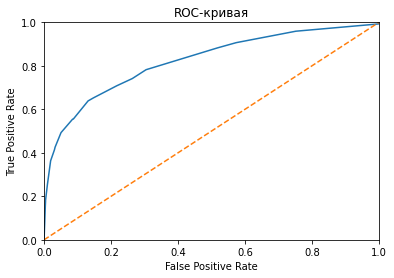

In [ ]:
# построение кривой ошибок
model = best_model
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')

plt.show()

In [ ]:
# площадь под кривой ошибок
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print("Площадь под ROC-кривой:", round(auc_roc, 3))

Площадь под ROC-кривой: 0.822


# Общий вывод

**В результате подготовки данных, установлено:**

1. Пропусков в столбце "Tenure" порядка 9% (проведена замена на медианные значения).
2. Необходимо удалить столбцы 'CustomerId', 'RowNumber', 'Surname' из признаков (они не несут полезной информации для предсказания).

**В результате исследования:**

1. Соотношение в данных 8:2.
2. Проведено порядковое кодирование (применение прямого привело бы к излишне большому количеству столбцов, что не к чему).
3. Применено масштабирование к столбцам 'CreditScore', 'Age', 'Tenure', 'Balance','EstimatedSalary'.
4. Выполнено деление на обучающую и валидационно-тестовую выборку (60:40).
5. Выполнено деление валидационно-тестовой выборки (50:50).
6. Установлено F1 лучшей модели (DecisionTreeClassifier): 0.57 с параметрами (max_depth=6, random_state=12345).
7. Установлено F1 лучшей модели (RandomForestClassifier): 0.538 с параметрами (max_depth=4, n_estimators=9, random_state=12345).
8. Установлено F1 лучшей модели (LogisticRegression): 0.331 с параметрами (max_iter=1000, random_state=12345, solver='saga').
9. В среднем наибольший прирост F1 по всем моделям, при увеличении выборки, дает МНОЖИТЕЛЬ - х3
10. Наибольший прирост F1 по DecisionTreeClassifier_model, при уменьшении выборки, дает МНОЖИТЕЛЬ - х0.6
11. Наибольший прирост F1 по RandomForestClassifier_model, при уменьшении выборки, дает МНОЖИТЕЛЬ - х0.3
12. Наибольший прирост F1 по LogisticRegression_model, при уменьшении выборки, дает МНОЖИТЕЛЬ - х0.4

**В результате тестирования, установлено:**
1. Наилучшая модель на тестовой выборке: DecisionTreeClassifier
2. Параметры модели: max_depth=5, random_state=12345
3. Значение F1 = 0.591
4. Площадь под ROC-кривой: 0.822